In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

# Brazilian Immigrant Population Analysis

In [2]:
year_2005 = pd.read_excel('Brazilian Immigrants 2005.xlsx')
year_2006 = pd.read_excel('Brazilian Immigrants 2006.xlsx')
year_2007 = pd.read_excel('Brazilian Immigrants 2007.xlsx')
year_2008 = pd.read_excel('Brazilian Immigrants 2008.xlsx')
year_2009 = pd.read_excel('Brazilian Immigrants 2009.xlsx')
year_2010 = pd.read_excel('Brazilian Immigrants 2010.xlsx')
year_2011 = pd.read_excel('Brazilian Immigrants 2011.xlsx')

year_tuple = (year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011)
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011]

In [3]:
features_list = ['Population',      # 0
'Age 0 to 4',       # 1
'Age 05 to 09',     # 2
'Age 10 to 19',     # 3
'Age 20 to 24',     # 4
'Age 25 to 29',     # 5
'Age 30 to 34',     # 6
'Age 35 to 39',     # 7             
'Age 40 to 44',     # 8
'Age 45 to 49',     # 9
'Age 50 to 54',     # 10
'Age 55 to 59',     # 11
'Age 60 to 64',     # 12
'Age 65 to 69',     # 13
'Age 70 to 74',     # 14
'Age 75 to 79',     # 15
'Age 80 to 84',     # 16
'Age 85 plus',      # 17
'Female',           # 18
'Male',             # 19
'Married',          # 20
'Widowed',          # 21
'Divorced',         # 22
'Separated',        # 23
'Never married/under 15 years old',     # 24, 'Never married or under 15 years old'
'U.S. citizen by naturalization',       # 25
'Not a citizen of the U.S.',            # 26
'Entered US before 2000',               # 27
'Entered US in 2000 or later',          # 28
'Speaks English Less Than Very Well',   # 29
'Less than high school',                # 30
'High School Graduate/GED',             # 31, 'High School Graduate/GED or Alternative Credential'
'Some College/Associate Degree',        # 32
'Bachelors Degree or Higher',           # 33
'Males In Civilian Labor Force',        # 34
'Females In Civilian Labor Force',      # 35
'Unemployed Males',                     # 36
'Unemployed Females',                   # 37
'Private Wage and Salary Workers',      # 38
'Government Workers',                   # 39
'Self employed Not incorporated',       # 40
'Self employed Incorporated',           # 41
'Accommodation and Food Services',      # 42, 'Accommodation and Food Services; and Arts, Entertainment and Recreation'
'Construction',                  # 43
'Education',                     # 44
'Finance',                       # 45, 'Finance, Insurance, and Real Estate',
'Health Care',                   # 46, 'Health Care & Social Assistance'
'Information',                   # 47
'Manufacturing',                 # 48
'Other Services',                # 49
'Professional Services',         # 50, 'Professional, Scientific, Management, and Administrative Services'
'Public Administration',         # 51
'Retail',                        # 52
'Utilities',                     # 53, 'Transportation, Warehousing, & Utilities & Natural resources'
'Wholesale Trade',               # 54
'Other',                         # 55
'Management & Professional',     # 56
'Services',                      # 57
'Sales and Office',              # 58
'Construction and Extracion',    # 59
'Maintenance and Repair',        # 60
'Production',                    # 61, 'Production, Transportation and Material Moving'
'Educational Instruction',       # 62, 'Educational Instruction and Library Occupations'
'Entertainment Occupations',     # 63, 'Arts, Design, Entertainment, Sports, and Media Occupations'
'Healthcare Practitioner',       # 64, 'Healthcare Practitioner and Technical Occupations'
'Other',                         # 65
'Individuals Below Poverty',     # 66
'Individuals Above Poverty',     # 67
'Not Determined',                # 68
'Median Personal Earnings',      # 69
'Median Personal Earnings (excl 0 and neg)']     # 70

In [4]:
year_2005['State Code'] = features_list
year_2006['State Code'] = features_list
year_2007['State Code'] = features_list
year_2008['State Code'] = features_list
year_2009['State Code'] = features_list
year_2010['State Code'] = features_list
year_2011['State Code'] = features_list

In [5]:
ma_2005 = year_2005[25]
ma_2006 = year_2006[25]
ma_2007 = year_2007[25]
ma_2008 = year_2008[25]
ma_2009 = year_2009[25]
ma_2010 = year_2010[25]
ma_2011 = year_2011[25]

# Combine the pandas objects into a list for ease of use
frames = [ma_2005, ma_2006, ma_2007, ma_2008, ma_2009, ma_2010, ma_2011]

# Concatenate the pandas objects
ma = pd.concat(frames, axis=1)

# Rename the columns to their respective years
ma = ma.set_axis(['2005','2006', '2007','2008' ,'2009', '2010', '2011'], axis=1, inplace=False)

In [6]:
male_count = []
female_count = []

for year in year_tuple:
    male_count.append(year[25][19])
    female_count.append(year[25][18])
    
print(male_count)
print(female_count)

[48207.0, 42170.0, 39875.0, 37934.0, 38999.0, 37401.0, 31259.0]
[40340.0, 33639.0, 28028.0, 33148.0, 30503.0, 35643.0, 31837.0]


In [7]:
# Graphs age distribution of a single year given the specific year dataframe and an int year (used for title)
def graph_age_range(year_data, year):
    ages = [year_data[25][age] for age in range(1, 18)]
    age_ranges = [year_data['State Code'][ranges] for ranges in range(1,18)]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(age_ranges,ages)
    ax.set_ylim(0,18000)
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Age Ranges')
    ax.set_title('Age Ranges for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    plt.show()
    
    return


# Graphs gender distribution of a single year given the specific year dataframe and an int year (used for title)
def graph_gender_distribution(year_data, year):
    genders = [year_data[25][gender] for gender in range(18, 20)]
    gender_ranges = [year_data['State Code'][ranges] for ranges in range(18,20)]

    total = year_data[25][0]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(gender_ranges,genders, width = 0.5)
    ax.set_ylim(0,50000)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center')
    
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Gender')
    ax.set_title('Distribution of Genders for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.show()
    
    return

# Graphs the distribution of genders overtime 
def graph_gender_over_time(male_count, female_count, years):
    # data to plot
    n_groups = len(male_count)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    plt.bar(index, male_count, bar_width,
        alpha=opacity,
        color='b',
        label='Men')

    plt.bar(index + bar_width, female_count, bar_width,
        alpha=opacity,
        color='r',
        label='Women')
    
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.title('Female and Male Brazilian Population in Massachusetts Over Time')
    plt.xticks(index + bar_width, years)
    plt.legend()

    plt.tight_layout()
    plt.show()


    return 

# Population

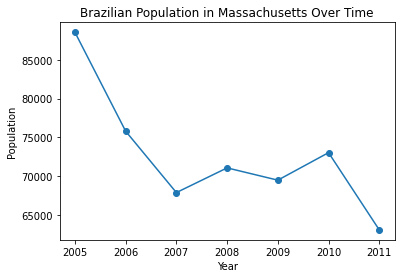

In [8]:
populations = [year_2005[25][0],year_2006[25][0], year_2007[25][0], year_2008[25][0], year_2009[25][0],
              year_2010[25][0], year_2011[25][0]]

plt.plot(years, populations, marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Brazilian Population in Massachusetts Over Time')
plt.show()

# Age

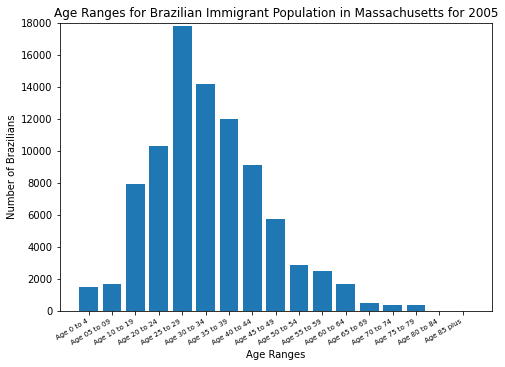

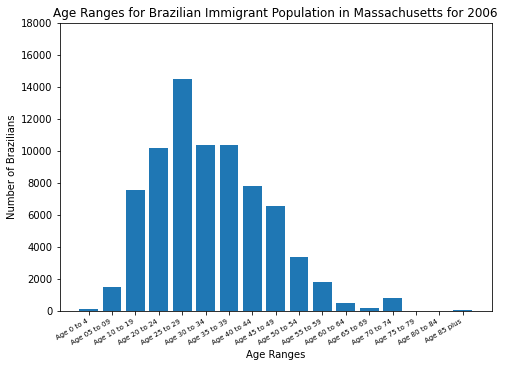

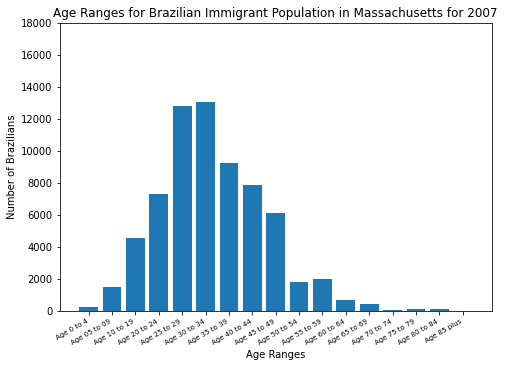

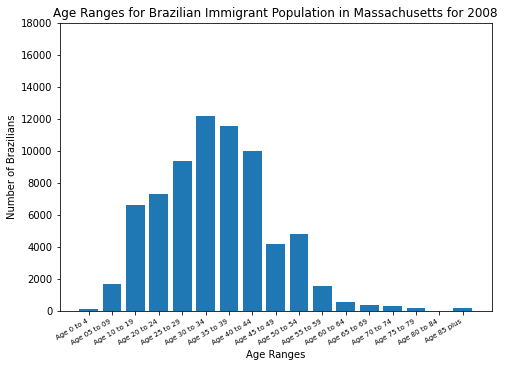

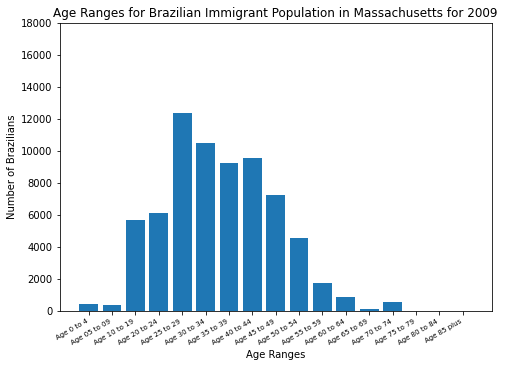

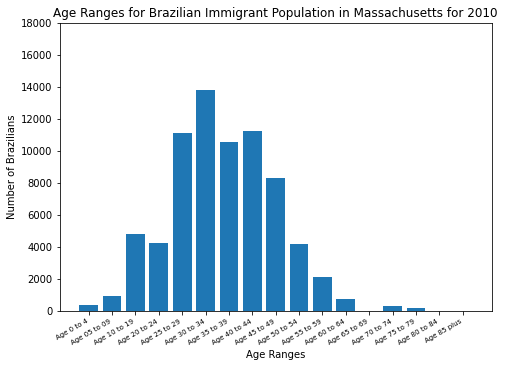

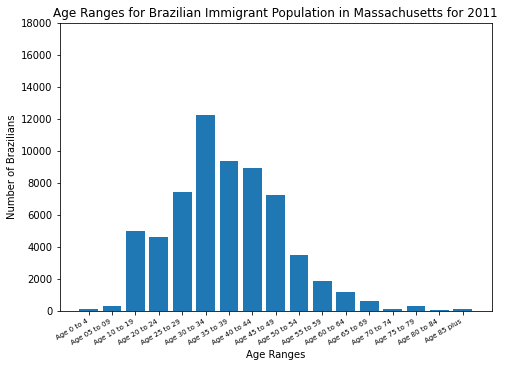

In [9]:
graph_age_range(year_2005, '2005')
graph_age_range(year_2006, '2006')
graph_age_range(year_2007, '2007')
graph_age_range(year_2008, '2008')
graph_age_range(year_2009, '2009')
graph_age_range(year_2010, '2010')
graph_age_range(year_2011, '2011')

# Gender

Male/Female Brazilian Population in Massachusetts by Year


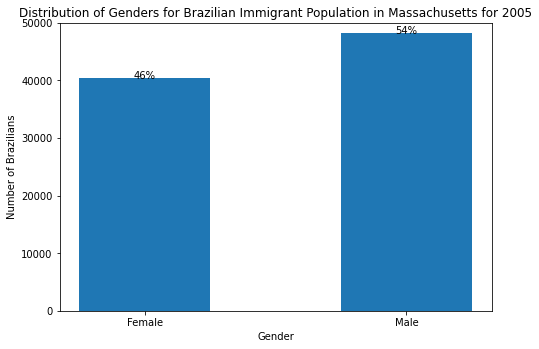

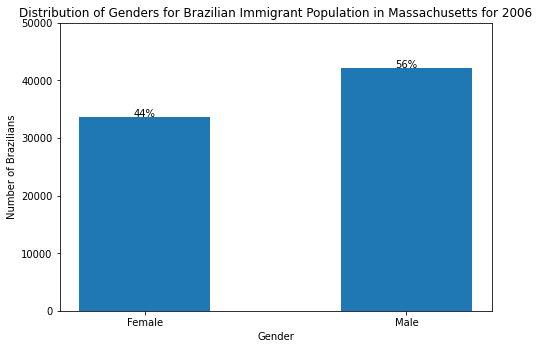

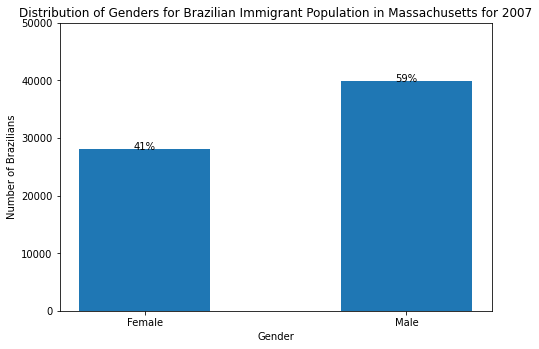

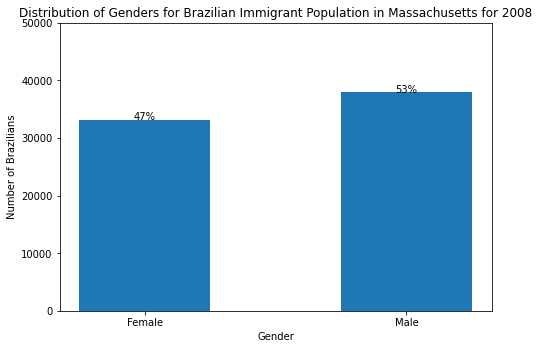

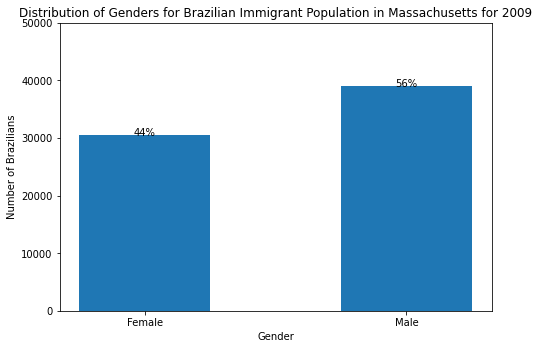

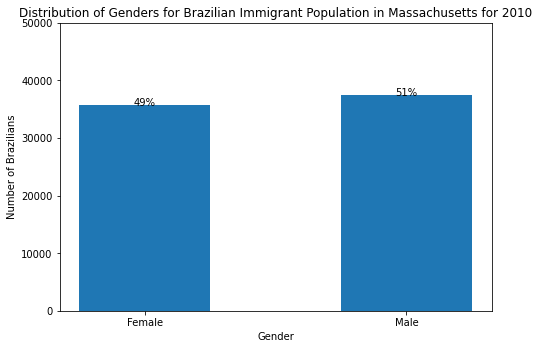

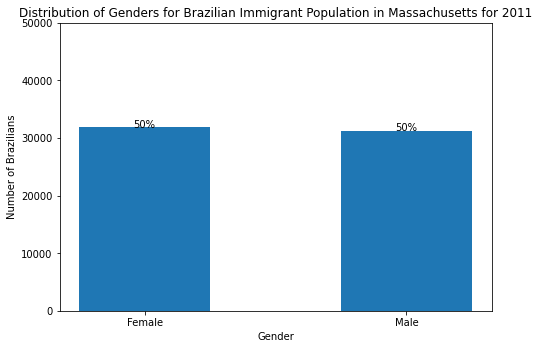

In [10]:
print("Male/Female Brazilian Population in Massachusetts by Year")

graph_gender_distribution(year_2005, '2005')
graph_gender_distribution(year_2006, '2006')
graph_gender_distribution(year_2007, '2007')
graph_gender_distribution(year_2008, '2008')
graph_gender_distribution(year_2009, '2009')
graph_gender_distribution(year_2010, '2010')
graph_gender_distribution(year_2011, '2011')

Male/Female Brazilian Population in Massachusetts Over Time


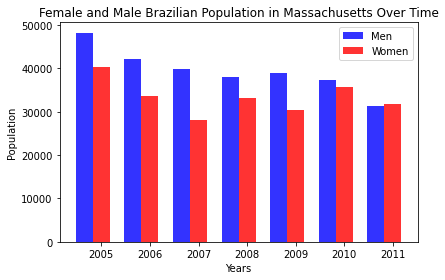

In [11]:
print("Male/Female Brazilian Population in Massachusetts Over Time")
graph_gender_over_time(male_count, female_count, years)

# Employment

In [12]:
# graph_employment: Graphs employment distribution
# Parameters: 
#     df: the dataframe used
#     year: an int year
def graph_employment_industry(df, year):
    
    data = [df[25][data] for data in range(42, 56)]
    features = [df['State Code'][feature] for feature in range(42, 56)]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(features,data)
    ax.set_ylim(0, 18000)
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Industry Types')
    ax.set_title('Industry Types for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    plt.show()
    
    return

def graph_employment_occupation(df, year):
    
    data = [df[25][data] for data in range(56, 66)]
    features = [df['State Code'][feature] for feature in range(56, 66)]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(features,data)
    ax.set_ylim(0, 40000)
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Occupation Types')
    ax.set_title('Occupation Types for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    plt.show()
    
    return

def line_plot_employment(df, begin_range, end_range, title, num):
    data = []
    features_legend = []
    
    colors = []
    
    color = iter(cm.rainbow(np.linspace(0, 1, num)))
    for i in range(num):
       colors.append(next(color))
    
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylim(0,21000)
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Years')
    ax.set_title(title)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    
    for feature in range (begin_range, end_range):
        data.append(df.loc[feature].tolist())
        features_legend.append(features_list[feature])
    
    for feature in range(len(data)):
        plt.plot(years, data[feature], label = features_legend[feature], color = colors[feature])
    
    plt.legend(loc="upper right", prop={'size': 8})
    plt.show()

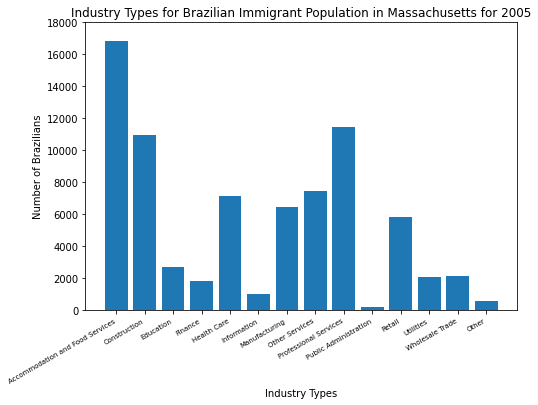

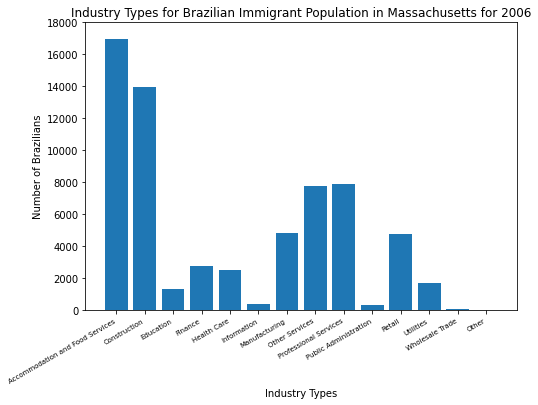

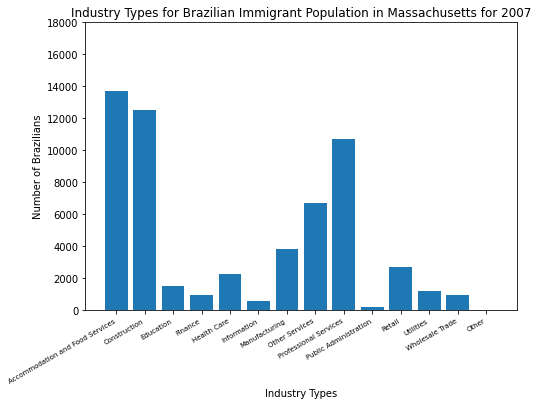

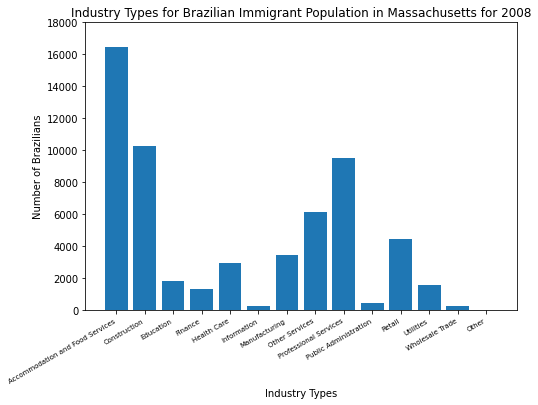

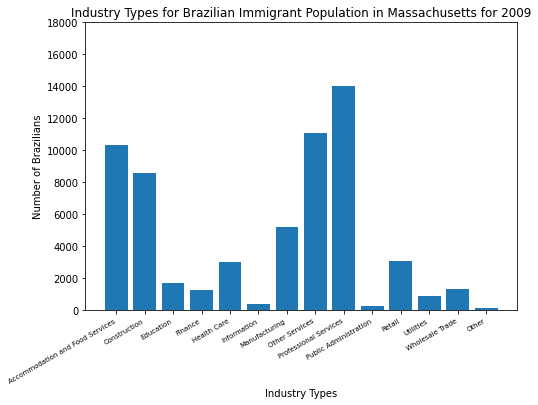

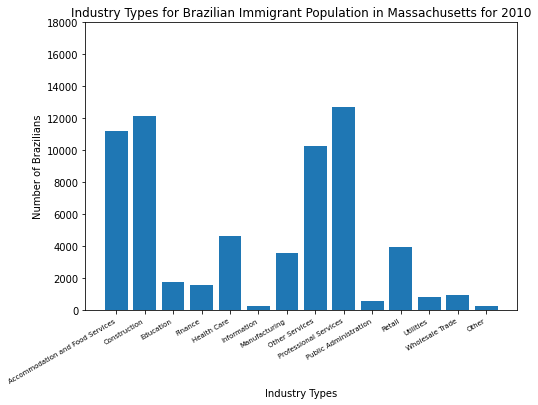

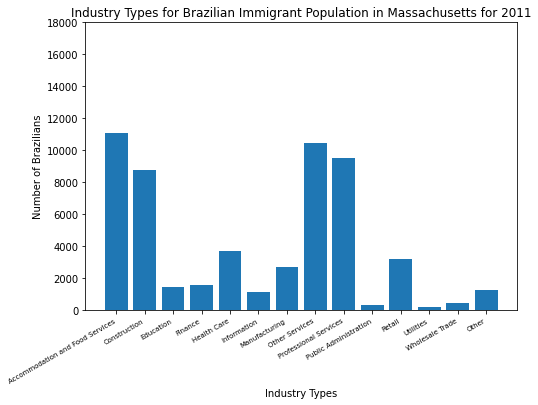

In [13]:
graph_employment_industry(year_2005, '2005')
graph_employment_industry(year_2006, '2006')
graph_employment_industry(year_2007, '2007')
graph_employment_industry(year_2008, '2008')
graph_employment_industry(year_2009, '2009')
graph_employment_industry(year_2010, '2010')
graph_employment_industry(year_2011, '2011')

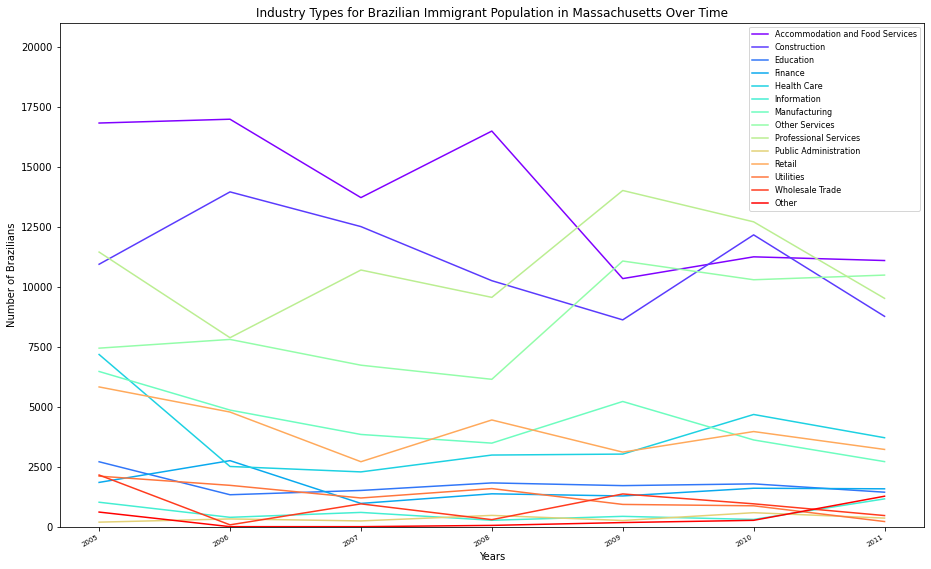

In [14]:
line_plot_employment(ma, 42, 56, 'Industry Types for Brazilian Immigrant Population in Massachusetts Over Time', 14)

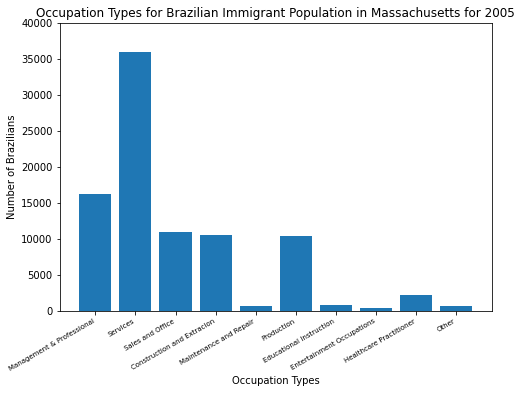

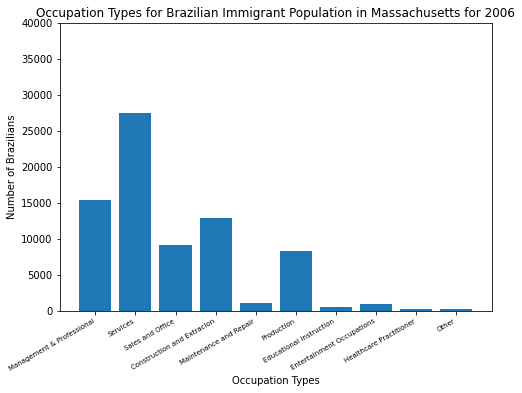

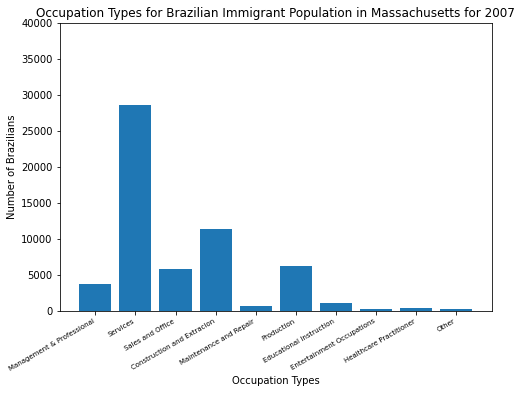

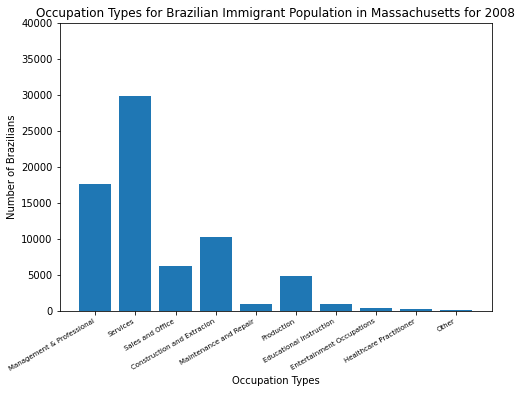

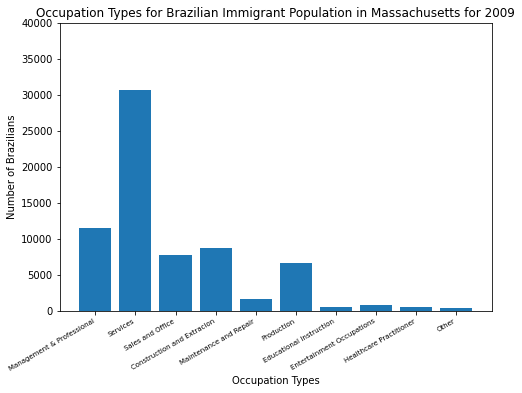

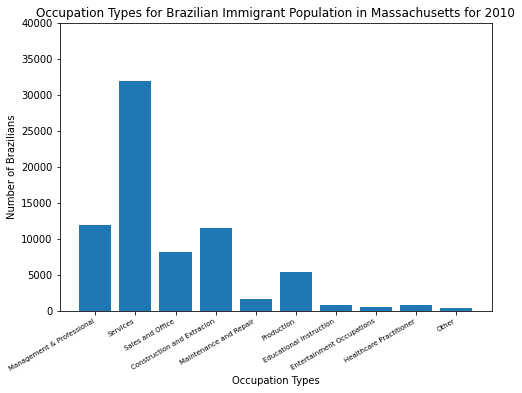

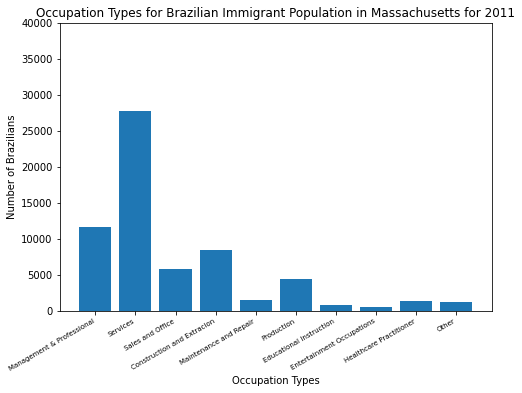

In [15]:
graph_employment_occupation(year_2005, '2005')
graph_employment_occupation(year_2006, '2006')
graph_employment_occupation(year_2007, '2007')
graph_employment_occupation(year_2008, '2008')
graph_employment_occupation(year_2009, '2009')
graph_employment_occupation(year_2010, '2010')
graph_employment_occupation(year_2011, '2011')

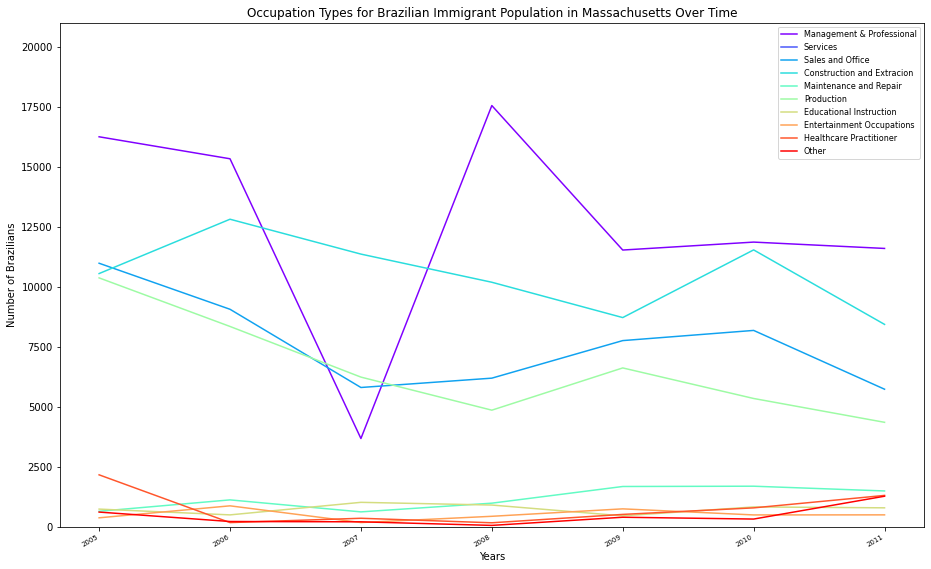

In [16]:
line_plot_employment(ma, 56, 66, 'Occupation Types for Brazilian Immigrant Population in Massachusetts Over Time', 10)

# Marital Status

In [17]:
married_count = []
widowed_count = []
divorced_count = []
seperated_count = []
never_or_under_fifteen_count = []


for year in year_tuple:
    married_count.append(year[25][20])
    divorced_count.append(year[25][22])
    widowed_count.append(year[25][21])
    seperated_count.append(year[25][23])
    never_or_under_fifteen_count.append(year[25][24])
    
print(married_count)
print(widowed_count)
print(divorced_count)
print(seperated_count)
print(never_or_under_fifteen_count)

[47448.0, 38377.0, 36544.0, 37268.0, 33568.0, 38248.0, 34938.0]
[290.0, 642.0, 404.0, 952.0, 844.0, 820.0, 771.0]
[3895.0, 5069.0, 3874.0, 5198.0, 7702.0, 6646.0, 5921.0]
[1449.0, 1209.0, 2182.0, 1687.0, 2613.0, 3218.0, 1738.0]
[35465.0, 30512.0, 24899.0, 25977.0, 24775.0, 24112.0, 19728.0]


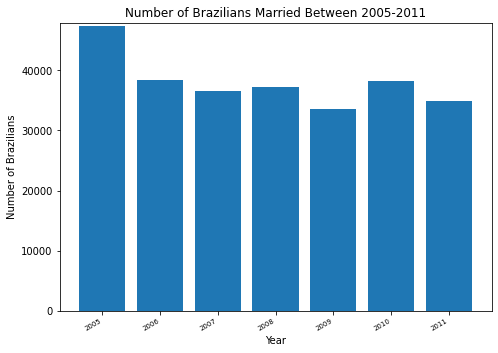

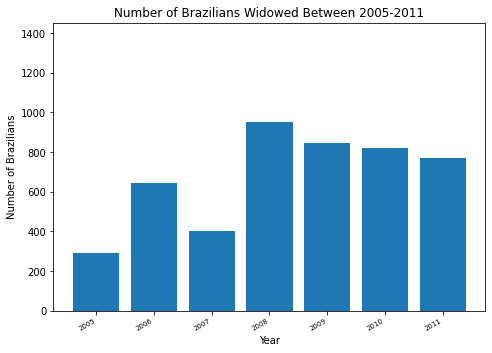

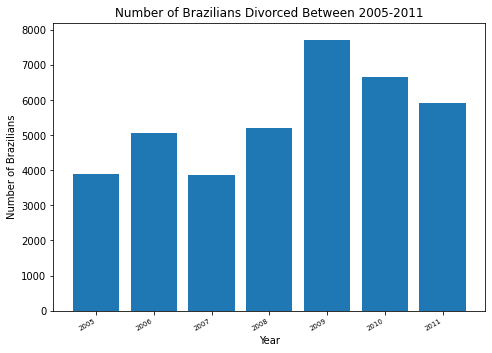

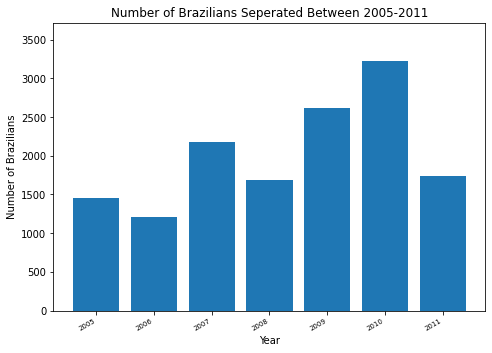

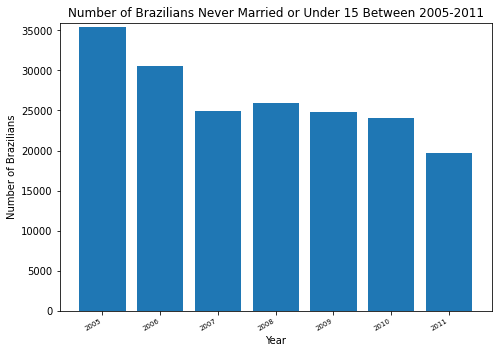

In [18]:
#Graph different types of marital status among the Brazilian population over time
def graph_marital_status(data, years, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(years, data)
    ax.set_ylim(0,max(data)+500)
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Year')
    ax.set_title(title)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    plt.show()

years = [2005,2006,2007,2008,2009,2010,2011]
graph_marital_status(married_count, years, 'Number of Brazilians Married Between 2005-2011')
graph_marital_status(widowed_count, years, 'Number of Brazilians Widowed Between 2005-2011')
graph_marital_status(divorced_count, years, 'Number of Brazilians Divorced Between 2005-2011')
graph_marital_status(seperated_count, years, 'Number of Brazilians Seperated Between 2005-2011')
graph_marital_status(never_or_under_fifteen_count, years, 'Number of Brazilians Never Married or Under 15 Between 2005-2011')

# Citizenship

In [19]:
citizen_count = []
non_citizen_count = []
for year in year_tuple:
    citizen_count.append(year[25][25])
    non_citizen_count.append(year[25][26])
    
print(citizen_count)
print(non_citizen_count)

[11809.0, 10665.0, 8833.0, 12899.0, 12189.0, 12151.0, 12417.0]
[76738.0, 65144.0, 59070.0, 58183.0, 57313.0, 60893.0, 50679.0]


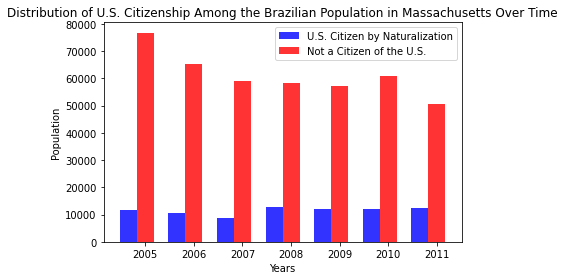

In [20]:
# Graphs the distribution of U.S. citizenship overtime 
def graph_citizenship_over_time(citizen_count, non_citizen_count, years):
    # data to plot
    n_groups = len(citizen_count)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    plt.bar(index, citizen_count, bar_width,
        alpha=opacity,
        color='b',
        label='U.S. Citizen by Naturalization')

    plt.bar(index + bar_width, non_citizen_count, bar_width,
        alpha=opacity,
        color='r',
        label='Not a Citizen of the U.S.')
    
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.title('Distribution of U.S. Citizenship Among the Brazilian Population in Massachusetts Over Time')
    plt.xticks(index + bar_width, years)
    plt.legend()

    plt.tight_layout()
    plt.show()

graph_citizenship_over_time(citizen_count, non_citizen_count, years)

# Year of Entry

In [21]:
before2000_count = []
after2000_count = []
for year in year_tuple:
    before2000_count.append(year[25][27])
    after2000_count.append(year[25][28])
    
print(before2000_count)
print(after2000_count)

[37937.0, 30317.0, 23061.0, 26889.0, 27327.0, 25586.0, 20898.0]
[50610.0, 45492.0, 44842.0, 44193.0, 42175.0, 47458.0, 42198.0]


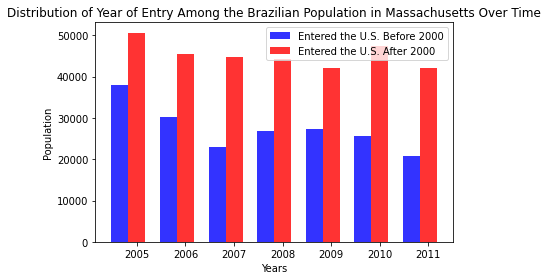

In [22]:
# Graphs the distribution of Year of Entry overtime 
def YOE_over_time(before2000_count, after2000_count, years):
    # data to plot
    n_groups = len(before2000_count)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    plt.bar(index, before2000_count, bar_width,
        alpha=opacity,
        color='b',
        label='Entered the U.S. Before 2000')

    plt.bar(index + bar_width, after2000_count, bar_width,
        alpha=opacity,
        color='r',
        label='Entered the U.S. After 2000')
    
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.title('Distribution of Year of Entry Among the Brazilian Population in Massachusetts Over Time')
    plt.xticks(index + bar_width, years)
    plt.legend()

    plt.tight_layout()
    plt.show()

YOE_over_time(before2000_count, after2000_count, years)

# Ability to Speak English

In [23]:
verywell_count = []
lessthan_count = []
for year in year_tuple:
    verywell_count.append(year[25][0]-year[25][29])
    lessthan_count.append(year[25][29])
    
print(verywell_count)
print(lessthan_count)

[27903.0, 22989.0, 21125.0, 27983.0, 25659.0, 28655.0, 27515.0]
[60644.0, 52820.0, 46778.0, 43099.0, 43843.0, 44389.0, 35581.0]


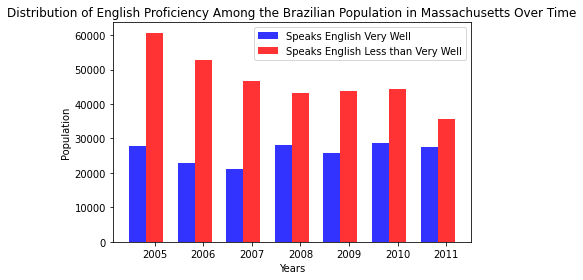

In [24]:
# Graphs the distribution of Year of Entry overtime 
def proficiency_over_time(verywell_count, lessthan_count, years):
    # data to plot
    n_groups = len(verywell_count)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    plt.bar(index, verywell_count, bar_width,
        alpha=opacity,
        color='b',
        label='Speaks English Very Well')

    plt.bar(index + bar_width, lessthan_count, bar_width,
        alpha=opacity,
        color='r',
        label='Speaks English Less than Very Well')
    
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.title('Distribution of English Proficiency Among the Brazilian Population in Massachusetts Over Time')
    plt.xticks(index + bar_width, years)
    plt.legend()

    plt.tight_layout()
    plt.show()

proficiency_over_time(verywell_count, lessthan_count, years)

# Correlations

In [25]:
# Transpose the dataframe and rename the columns to features for ease of use
correlation_ma = ma.T
correlation_ma = correlation_ma.set_axis(features_list, axis=1, inplace=False)

In [26]:
gender_education = correlation_ma[['Female', 'Male', 'Less than high school', 'High School Graduate/GED',
                                 'Some College/Associate Degree', 'Bachelors Degree or Higher']]

gender_poverty = correlation_ma[['Female', 'Male', 'Individuals Below Poverty', 
                                 'Individuals Above Poverty', 'Not Determined']]

speakenglish_poverty = correlation_ma[['Speaks English Less Than Very Well', 'Individuals Below Poverty', 
                                 'Individuals Above Poverty', 'Not Determined']]

education_poverty = correlation_ma[['Less than high school', 'High School Graduate/GED', 
                                    'Some College/Associate Degree', 'Bachelors Degree or Higher', 
                                    'Individuals Below Poverty', 'Individuals Above Poverty', 'Not Determined']]

# not including 'other'
industry_poverty = correlation_ma[['Accommodation and Food Services', 'Construction', 'Education', 'Finance', 
                                   'Health Care', 'Information', 'Manufacturing', 'Other Services', 
                                   'Professional Services', 'Public Administration', 'Retail', 'Utilities', 
                                   'Wholesale Trade', 'Individuals Below Poverty', 'Individuals Above Poverty', 
                                   'Not Determined']]

# not including 'other'
occupation_poverty = correlation_ma[['Management & Professional', 'Services', 'Sales and Office', 
                                     'Construction and Extracion', 'Maintenance and Repair', 'Production',
                                     'Educational Instruction', 'Entertainment Occupations', 'Healthcare Practitioner',
                                     'Individuals Below Poverty', 'Individuals Above Poverty', 
                                     'Not Determined']]

<AxesSubplot:>

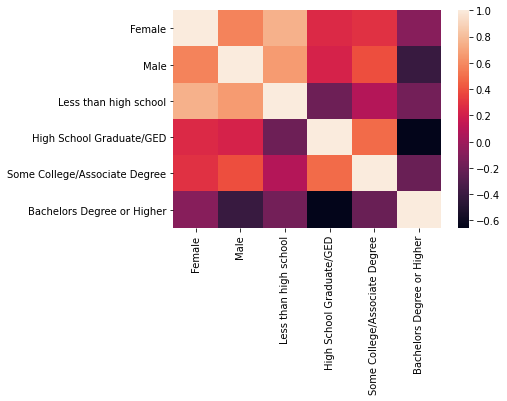

In [27]:
sns.heatmap(gender_education.corr())

<AxesSubplot:>

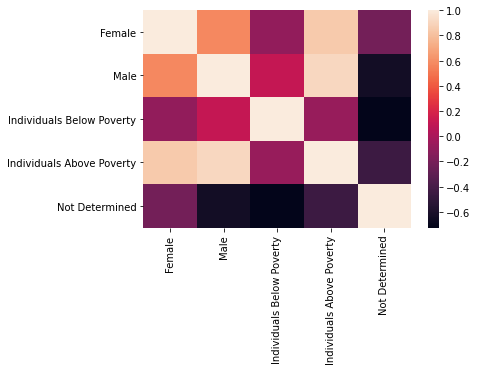

In [28]:
sns.heatmap(gender_poverty.corr())

<AxesSubplot:>

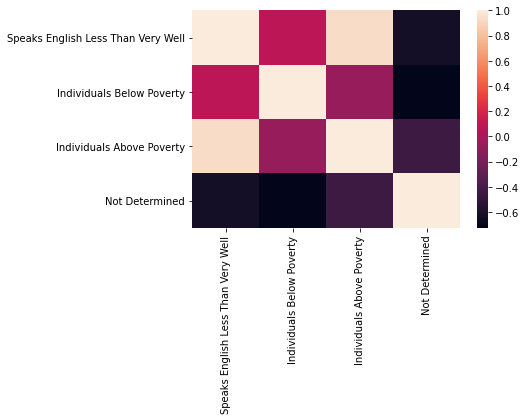

In [29]:
sns.heatmap(speakenglish_poverty.corr())

<AxesSubplot:>

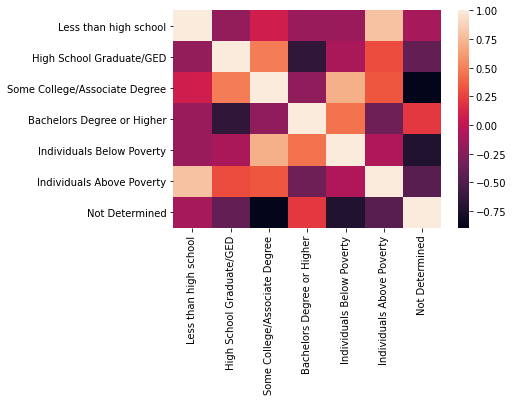

In [30]:
sns.heatmap(education_poverty.corr())

<AxesSubplot:>

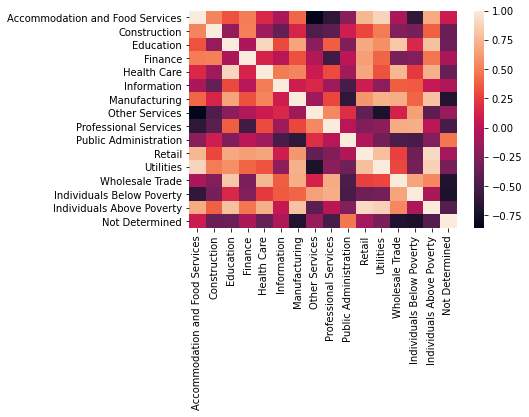

In [31]:
sns.heatmap(industry_poverty.corr())

<AxesSubplot:>

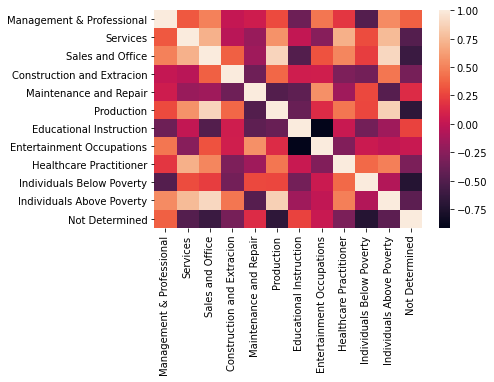

In [32]:
sns.heatmap(occupation_poverty.corr())